In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('Leukemia.csv')

In [3]:
X = data.drop('type', axis = "columns")
Y = data['type']
feature_names = X.columns

Podatke svkakao moramo prvo normalizovati

### Normalizacija


In [4]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)

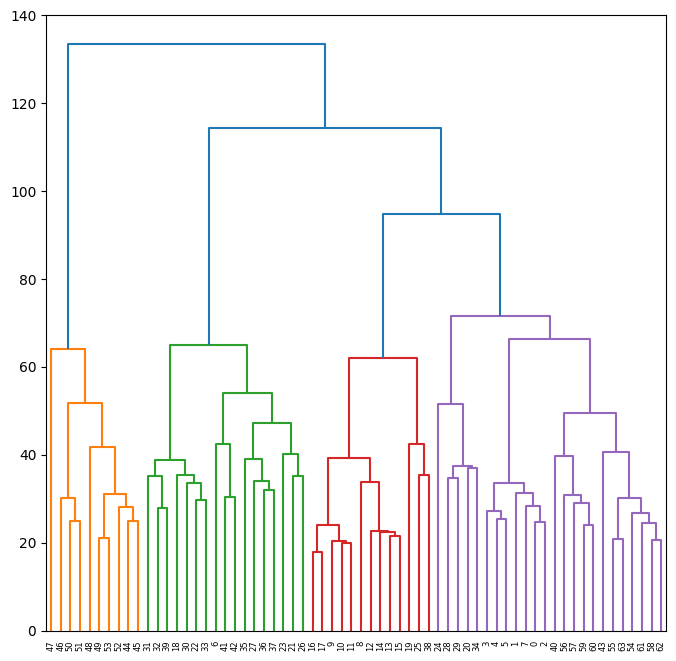

In [5]:
plt.figure(figsize = (8, 8))
stablo = shc.dendrogram((shc.linkage(x, method = 'ward')))
plt.show()

In [6]:
Y.replace("AML", 0, inplace = True)
Y.replace("Bone_Marrow", 1, inplace = True)
Y.replace("Bone_Marrow_CD34", 2, inplace = True)
Y.replace("PB", 3, inplace = True)
Y.replace("PBSC_CD34", 4, inplace = True)
Y.unique()

array([2, 1, 0, 3, 4])

- 0 -> AML
- 1 -> Bone_Marrow
- 2 -> Bone_Marrow_CD34
- 3 -> PB
- 4 -> PBSC_CD34

In [7]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [8]:
pca.explained_variance_ratio_[0:2].sum()

0.3616021352757541

### Sakupljajuce hijerarhijsko klasterovanje

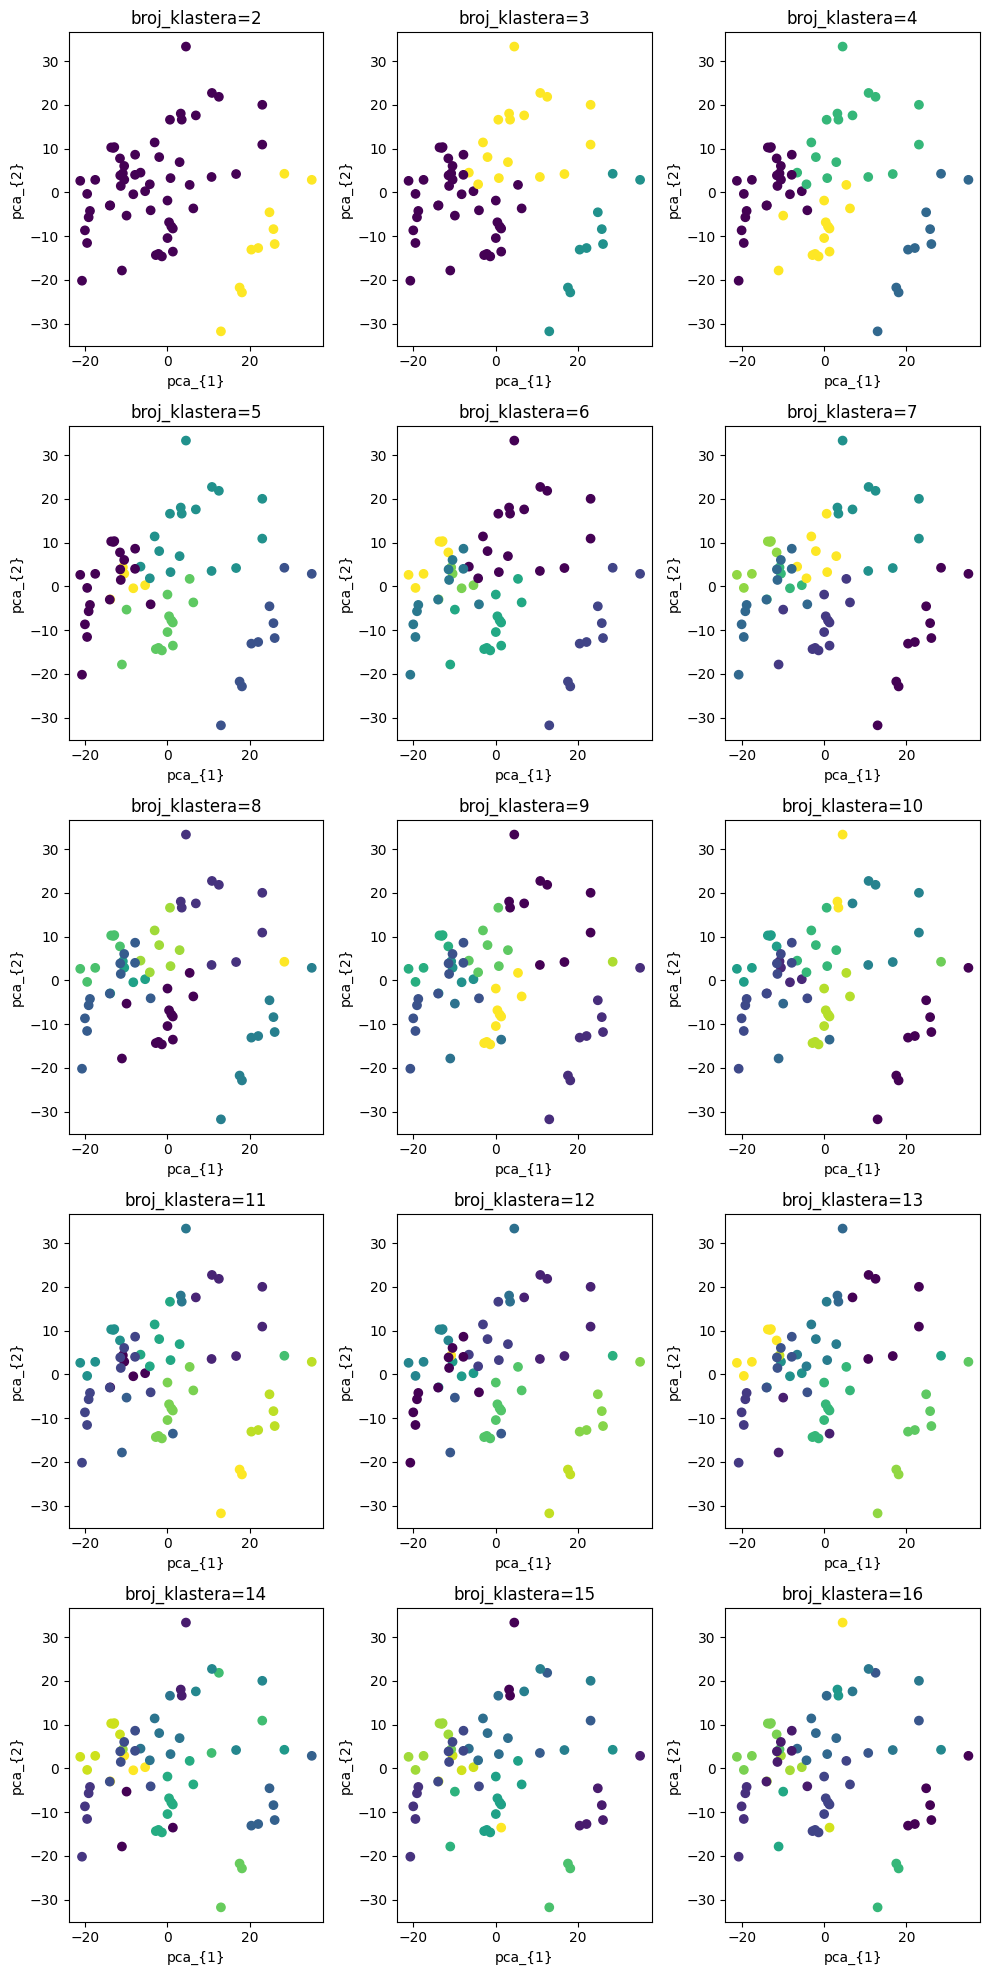

In [13]:
ks = [i for i in range(2, 17)]
sse = []
silh = []
fig, axs = plt.subplots(5, 3, figsize=(10, 20))
fig.suptitle("")

for k, ax in zip(ks, axs.flatten()):
    hijerarhijskoA = AgglomerativeClustering(n_clusters = k, memory = 'memory')
    hijerarhijskoA.fit(x)

    ax.scatter(x_pca[:, 0], x_pca[:, 1], c=hijerarhijskoA.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_{1}")
    ax.set_ylabel("pca_{2}")

    silh.append(silhouette_score(x_pca, hijerarhijskoA.labels_))

plt.tight_layout()
plt.show()

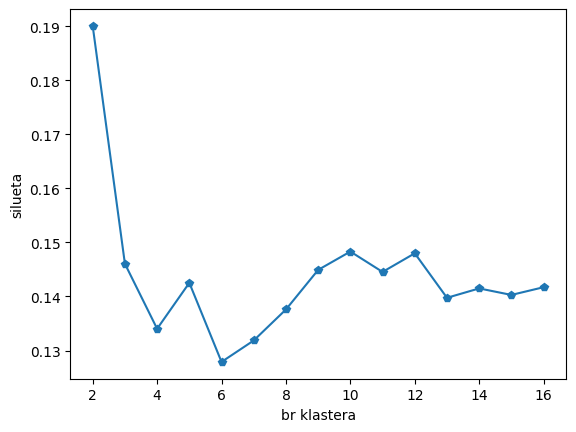

In [10]:
fig,ax = plt.subplots()
ax.plot(ks, silh, marker = 'p')
ax.set_xlabel("br klastera")
ax.set_ylabel("silueta")
plt.show()

Dakle, za sakupljajuce hijerarhijsko klasterovanje izgleda da bi najoptimalniji izbor broja klastera bio 6.

In [11]:
hijerarhijskoA10 = AgglomerativeClustering(n_clusters = 6, memory = 'memory')
hijerarhijskoA10.fit(x)

AgglomerativeClustering(memory='memory', n_clusters=6)

In [12]:
silhouette_score(x, hijerarhijskoA10.labels_)

0.12788567689855812

In [18]:
hijerarhijskoA12 = AgglomerativeClustering(n_clusters = 12, memory = 'memory')
hijerarhijskoA12.fit(x)

AgglomerativeClustering(memory='memory', n_clusters=12)

In [19]:
silhouette_score(x, hijerarhijskoA12.labels_)

0.14799282799657784